# Meme Detector - MemeOrNot Classification Model

In this model we are going to classify meme vs non meme images by using CNN.  
We collected random meme and non meme images from google search and split in 8:2 ratio saved in Train and Test folders with meme and notmeme subfolders.  
Tensorflow and keras used to build classification model


In [16]:
# import necessary libraries.

import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential
from tensorflow.keras.layers import Activation , Dropout , Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

### Building the Classification Model

In [17]:
model = Sequential()

#Conv2D: This is the first layer of your model which is the input layer where feature extraction takes place.
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))

#MaxPooling: It is a pooling operation that selects the maximum element from the region of the feature map that is covered by the filter.
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten: Flatten is used to transform the input into a vector and feed it into the fully connected layer. 
model.add(Flatten())

#Dense Layer: It is just a regular layer of neurons in a neural network. Here each neuron actually receives input from all the other neurons in the previous layer, thus densely connected.  
model.add(Dense(256, activation='relu'))
#Dropout: This is a technique that is used to prevent a model from overfitting
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

#Sigmoid and RELU Activation Functions  
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 12, 12, 64)       

### Image Augumentaion and ImageDataGenerator

In [18]:
# Image augmentation using ImageDataGenerator in keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1. / 255, 
        rotation_range=30,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    'dataset/Train',
    target_size=(64,64),
    batch_size=15,
    class_mode='binary')


test_set = test_datagen.flow_from_directory(
    'dataset/Test',
    target_size=(64,64),
    batch_size=15,
    class_mode='binary')

Found 4006 images belonging to 2 classes.
Found 788 images belonging to 2 classes.


### Compiling and Training

In [19]:
with tf.device('/GPU:0'):
    history = model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(
        training_set,
        steps_per_epoch=991//15,
        epochs=10,
        validation_data=test_set,
        validation_steps=296//15
    )

Epoch 1/10
66/66 [==============================] - 9s 136ms/step - loss: 0.5188 - accuracy: 0.7424 - val_loss: 0.3494 - val_accuracy: 0.8421
Epoch 2/10
66/66 [==============================] - 9s 132ms/step - loss: 0.3543 - accuracy: 0.8374 - val_loss: 0.1736 - val_accuracy: 0.9404
Epoch 3/10
66/66 [==============================] - 9s 133ms/step - loss: 0.2551 - accuracy: 0.8990 - val_loss: 0.3270 - val_accuracy: 0.8561
Epoch 4/10
66/66 [==============================] - 9s 137ms/step - loss: 0.2100 - accuracy: 0.9111 - val_loss: 0.1948 - val_accuracy: 0.9298
Epoch 5/10
66/66 [==============================] - 9s 136ms/step - loss: 0.2064 - accuracy: 0.9252 - val_loss: 0.3062 - val_accuracy: 0.9018
Epoch 6/10
66/66 [==============================] - 9s 138ms/step - loss: 0.1806 - accuracy: 0.9293 - val_loss: 0.3068 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 9s 137ms/step - loss: 0.1619 - accuracy: 0.9434 - val_loss: 0.3228 - val_accuracy: 0.8772
Epoch 

In [20]:
#saving the model.
model.save('meme_detection_model.h5')

### Predtict the image Meme or Not Meme using meme_detection_model

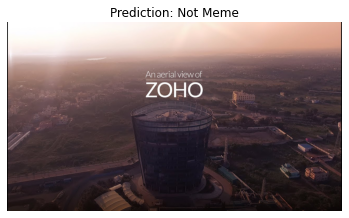

In [24]:
#initialize classifier
classifier = load_model('meme_detection_model.h5')

# Not Meme Image Example
img_original = load_img('test_non_meme_img.jpg')
img = load_img('test_non_meme_img.jpg', target_size = (64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor/=255.0

meme_prob = classifier.predict(img_tensor)

if meme_prob[0][0] < 0.5:
    prediction= 'Meme'
else:
    prediction = 'Not Meme'

plt.imshow(img_original)
plt.axis('off')
plt.title('Prediction: ' + prediction)
plt.show()

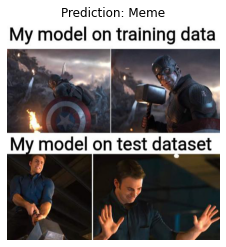

In [25]:
# Meme Image Example
img_original = load_img('test_meme_img.jpg')
img = load_img('test_meme_img.jpg', target_size = (64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor/=255.0

meme_prob = classifier.predict(img_tensor)

if meme_prob[0][0] < 0.5:
    prediction= 'Meme'
else:
    prediction = 'Not Meme'

plt.imshow(img_original)
plt.axis('off')
plt.title('Prediction: ' + prediction)
plt.show()

In this model, we reach 80% accuracy in meme detection.